# Demo 4: How to use plotting functions

## Define Geometry

In [1]:
import tigre
geo=tigre.geometry_default(high_quality=False)

## Load data and generate projections

In [2]:
import numpy as np
from tigre.utilities.Ax import Ax
from Test_data import data_loader
# define angles
angles=np.linspace(0,2*np.pi,dtype=np.float32)
# load head phantom data
head=data_loader.load_head_phantom(number_of_voxels=geo.nVoxel)
# generate projections
projections=Ax(head,geo,angles,'interpolated')

## Reconstruct image using OS-SART and FDK 

In [3]:
import tigre.algorithms as algs
from tigre.utilities.plotImg import plotImg

# OS_SART
niter=50
imgOSSART=algs.ossart(projections,geo,angles,niter)

# FDK 
imgfdk=algs.fdk(projections,geo,angles)

OS_SART algorithm in progress.
Esitmated time until completetion (s): 2.46085


/home/aabhca20/Documents/TIGRE-python/Python/tigre_python_build/tigre/Utilities/filtering.py:56: UserWarning: no filter selected, using default ram_lak
  warnings.warn('no filter selected, using default ram_lak')


## Let's use plotproj

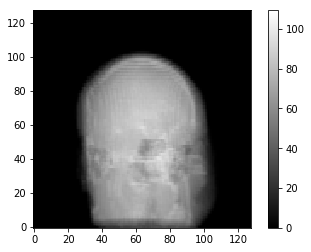

In [4]:
# plotproj plots the projection measured on the detector on each angle. 

from tigre.utilities.plotproj import plotproj 
plotproj(projections)

# another useful function is ppslice, which returns the projection at a single angle.
# Default is at projections[len(angles)/2]

from tigre.utilities.plotproj import ppslice
ppslice(projections,slice=35)


## what about plotImg?

Help on class plotImg in module tigre.Utilities.plotImg:

class plotImg
 |  plotImg(cube, dim) 
 |      plots figure 
 |  default: progressive in slices following
 |      axis (dim)
 |  Parameters 
 |  ---------- 
 |  cube : Any 3D numpy array 
 |  
 |  dim : ("X","Y","Z","x","y","z"), optional 
 |         default is "Z"
 |         NOTE: string arguments!
 |  slice: int, optional
 |       returns page of matrix according to index
 |  Examples:
 |  ---------
 |  a=np.ones([3,3,3])
 |  plotImg(a)
 |  >>>returns plot along dim Z
 |  plotImg(a,dim="X")
 |  >>>returns plot along dim X
 |  
 |  Methods defined here:
 |  
 |  __init__(self, cube, dim=None, slice=None)
 |  
 |  run(self)
 |  
 |  run_plot(self)
 |  
 |  slicer(self)



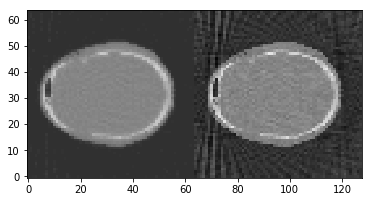

<tigre.Utilities.plotImg.plotImg instance at 0x7f00e601ab48>

In [6]:
# plotImg plots the final reconstruction of the 3D array. Dim defaults to z, but can be
# changed accordingly
from tigre.utilities.plotImg import plotImg
# For more info on what parameters to use, type:
help(plotImg)
plotImg(np.hstack((imgOSSART,imgfdk)),slice=32)